<a href="https://colab.research.google.com/github/Thesid4u/Predict-Big-Sales-Using-RFR/blob/main/Predicting_Big_Sales_Summer_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


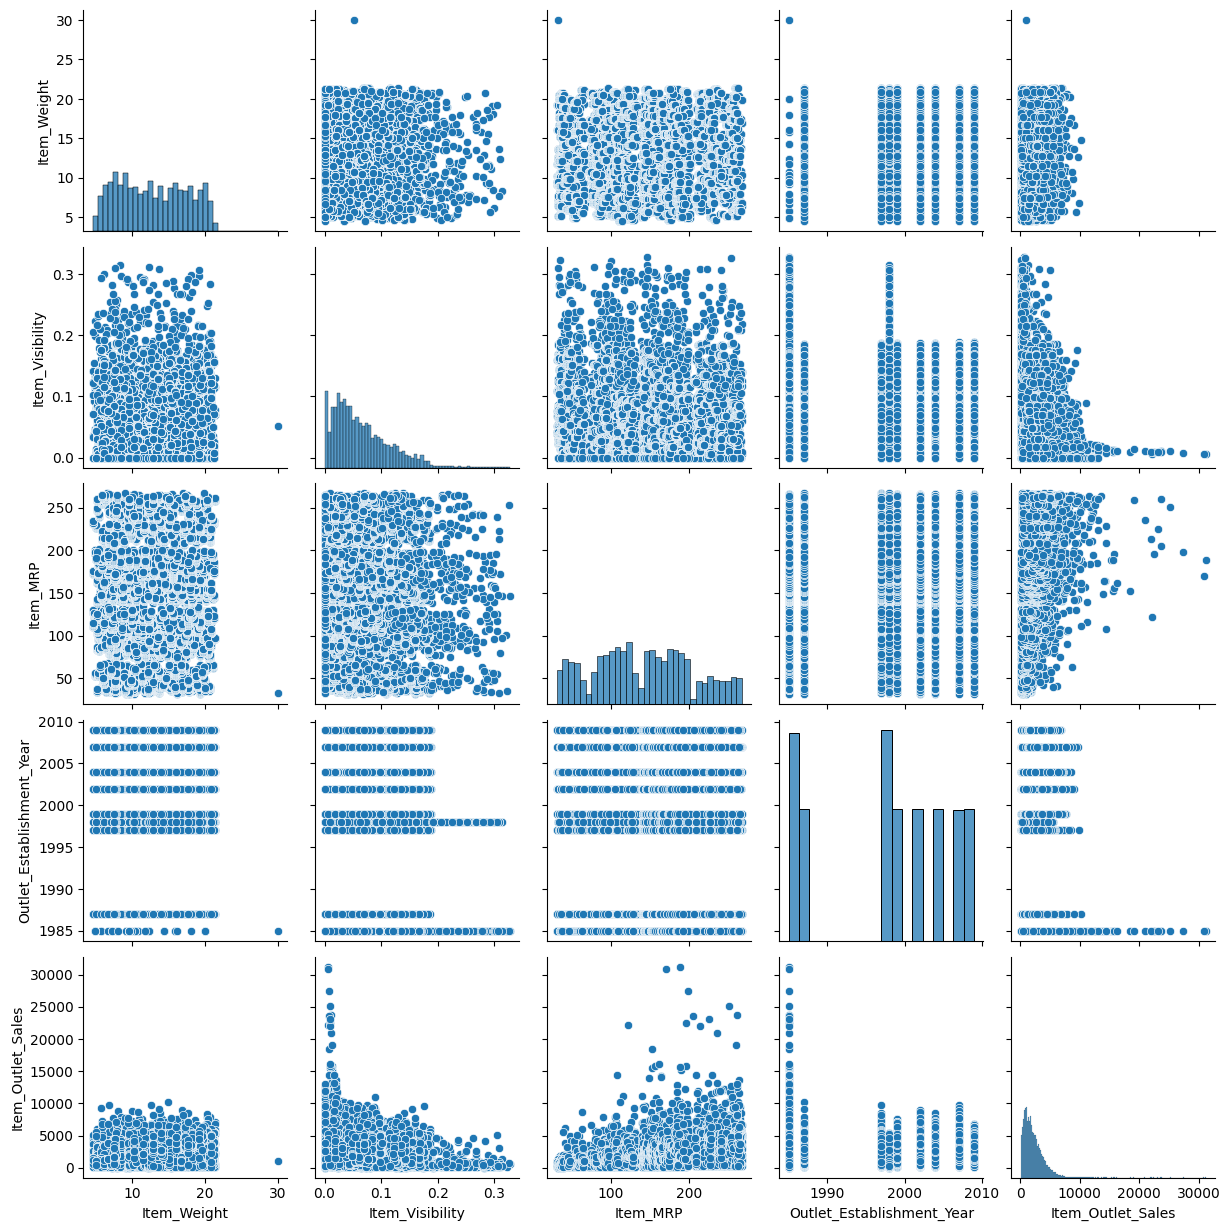

In [ ]:
sns.pairplot(df)

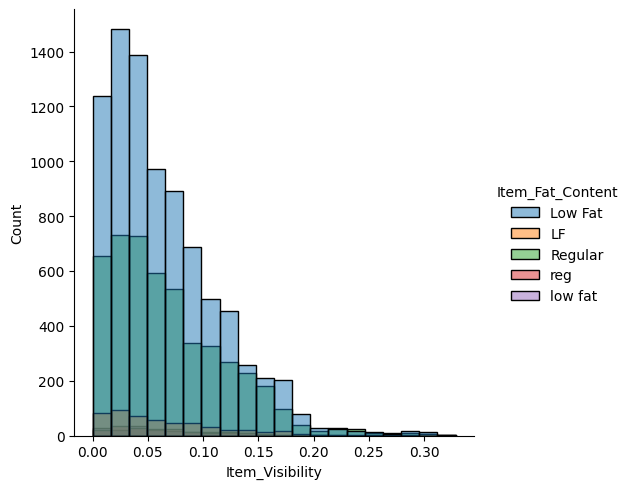

In [ ]:
sns.displot(data = df, x = 'Item_Visibility', kind = 'hist', bins = 20, hue = 'Item_Fat_Content')

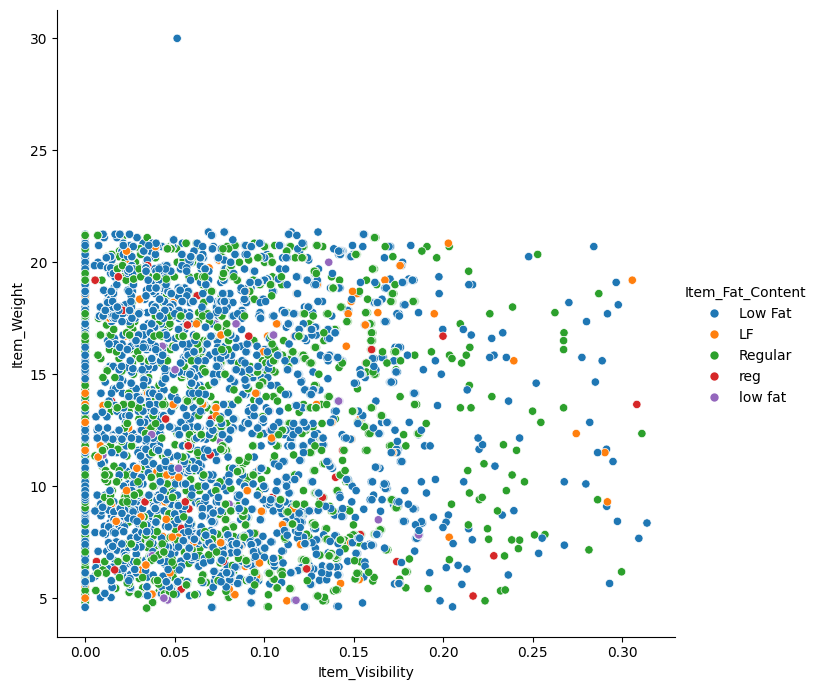

In [ ]:
sns.relplot(data = df, x = 'Item_Visibility', y = 'Item_Weight', hue = 'Item_Fat_Content', kind = 'scatter', height = 7 )

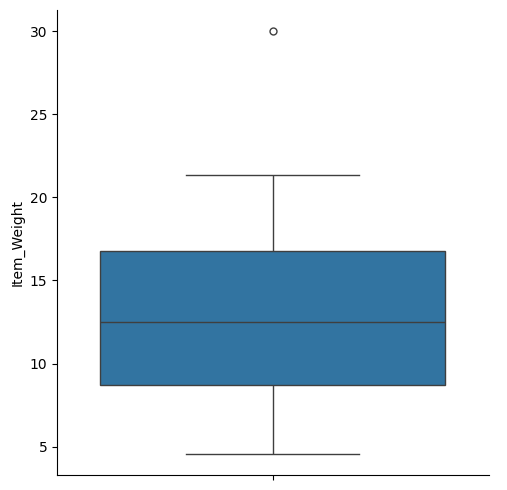

In [ ]:
sns.catplot(data = df, y = 'Item_Weight', kind = 'box')

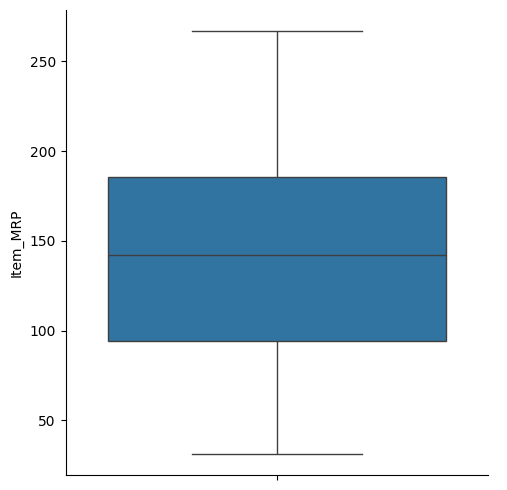

In [ ]:
sns.catplot(data = df, y = 'Item_MRP', kind = 'box')

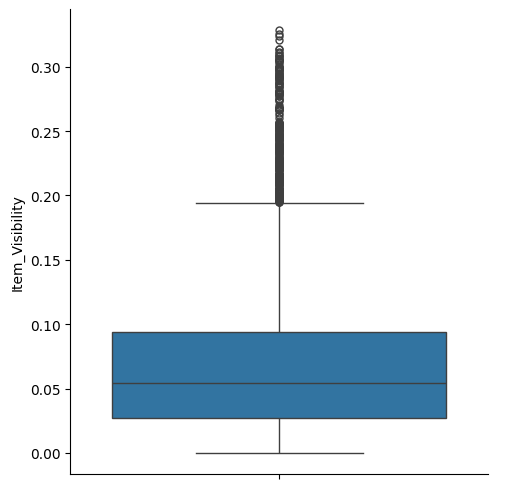

In [ ]:
sns.catplot(data = df, y = 'Item_Visibility', kind = 'box')

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

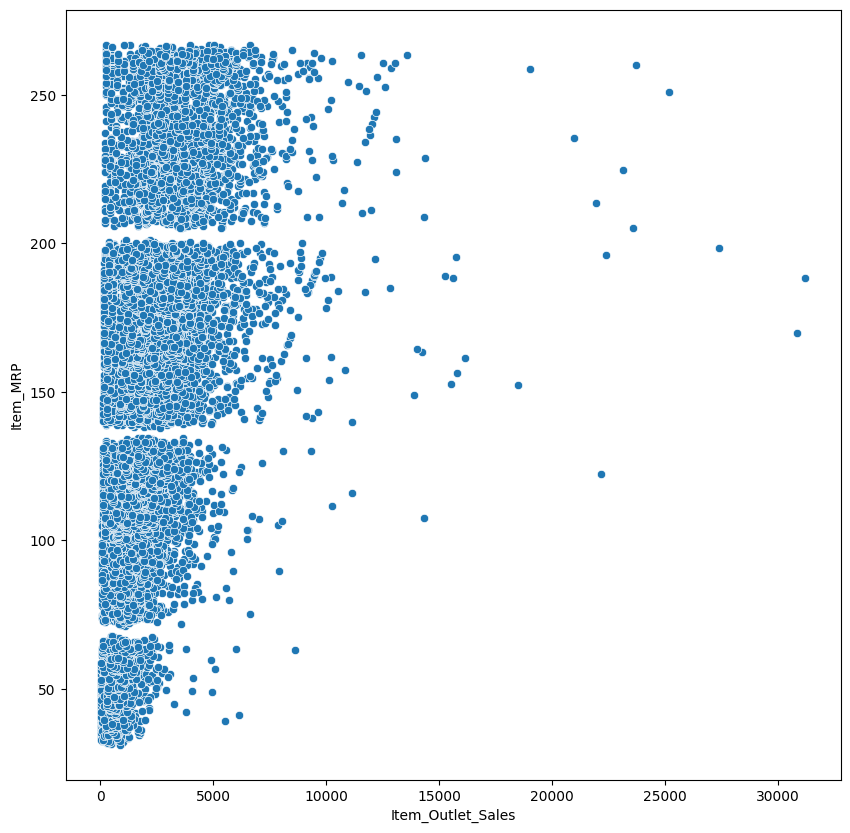

In [ ]:
plt.figure(figsize= (10,10))
sns.scatterplot(data = df, x = 'Item_Outlet_Sales', y = 'Item_MRP')

In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,2389
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
mean_weight_by_item_type = df.groupby(['Item_Type'])['Item_Weight'].transform('mean')

In [ ]:
df.fillna({'Item_Weight': mean_weight_by_item_type}, inplace=True)

In [ ]:
df.isnull().sum()


,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,8485
Regular,4824
LF,522
reg,195
low fat,178


In [ ]:
df.replace({'Item_Fat_Content': {'LF': 'Low Fat', 'low fat' : 'Low Fat','reg': 'Regular'}}, inplace=True)

In [ ]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,9185
Regular,5019


In [ ]:
df['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,2013
Snack Foods,1989
Household,1548
Frozen Foods,1426
Dairy,1136
Baking Goods,1086
Canned,1084
Health and Hygiene,858
Meat,736


In [ ]:
df.replace({'Item_Type' : {'Fruits and Vegetables' : 'Foods', 'Snack Foods' : 'Foods', 'Household' : 'Items',
                           'Frozen Foods' : 'Foods', 'Dairy' : 'Foods', 'Baking Goods' : 'Foods', 'Canned' : 'Foods',
                           'Health and Hygiene' : 'Items', 'Meat' : 'Foods', 'Soft Drinks' : 'Foods', 'Breads' : 'Foods',
                           'Hard Drinks' : 'Foods', 'Starchy Foods' : 'Foods', 'Breakfast' : 'Foods', 'Seafood' : 'Foods'}},
            inplace=True)

In [ ]:
df['Item_Type'].value_counts()

,count
Item_Type,
Foods,11518
Items,2406
Others,280


In [ ]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,7122
Small,5529
High,1553


In [ ]:
df['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,5583
Tier 2,4641
Tier 1,3980


In [ ]:
new_df = df.drop(columns = ['Item_Identifier', 'Outlet_Identifier'])

new_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,12.300000,Low Fat,0.111448,Foods,33.4874,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,12.300000,Low Fat,0.111904,Foods,33.9874,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,12.300000,Low Fat,0.111728,Foods,33.9874,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,12.300000,Low Fat,0.000000,Foods,34.3874,1985,Small,Tier 1,Grocery Store,1719.370000
4,9.800000,Regular,0.045523,Foods,35.0874,2007,Medium,Tier 2,Supermarket Type1,352.874000
...,...,...,...,...,...,...,...,...,...,...
14199,12.800000,Low Fat,0.069606,Foods,261.9252,2004,Small,Tier 2,Supermarket Type1,4984.178800
14200,12.800000,Low Fat,0.070013,Foods,262.8252,2007,Medium,Tier 2,Supermarket Type1,2885.577200
14201,12.800000,Low Fat,0.069561,Foods,263.0252,1987,High,Tier 3,Supermarket Type1,2885.577200
14202,13.659758,Low Fat,0.069282,Foods,263.5252,1985,Medium,Tier 3,Supermarket Type3,3803.676434


In [ ]:
data = pd.get_dummies(new_df, columns = ['Item_Fat_Content', 'Item_Type',
                                         'Outlet_Size', 'Outlet_Location_Type',
                                         'Outlet_Type'], drop_first = True)
data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Items,Item_Type_Others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,12.300000,0.111448,33.4874,1999,436.608721,False,False,False,True,False,False,False,True,False,False
1,12.300000,0.111904,33.9874,2007,443.127721,False,False,False,True,False,True,False,True,False,False
2,12.300000,0.111728,33.9874,2009,564.598400,False,False,False,True,False,False,True,False,True,False
3,12.300000,0.000000,34.3874,1985,1719.370000,False,False,False,False,True,False,False,False,False,False
4,9.800000,0.045523,35.0874,2007,352.874000,True,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,12.800000,0.069606,261.9252,2004,4984.178800,False,False,False,False,True,True,False,True,False,False
14200,12.800000,0.070013,262.8252,2007,2885.577200,False,False,False,True,False,True,False,True,False,False
14201,12.800000,0.069561,263.0252,1987,2885.577200,False,False,False,False,False,False,True,True,False,False
14202,13.659758,0.069282,263.5252,1985,3803.676434,False,False,False,True,False,False,True,False,False,True


In [ ]:
x = data.drop('Item_Outlet_Sales', axis = 1)
y = data['Item_Outlet_Sales']

x.shape, y.shape


((14204, 14), (14204,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [ ]:
x_std = x[['Item_Weight', 'Item_Visibility', 'Item_MRP',
           'Outlet_Establishment_Year']]
x_std

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,12.300000,0.111448,33.4874,1999
1,12.300000,0.111904,33.9874,2007
2,12.300000,0.111728,33.9874,2009
3,12.300000,0.000000,34.3874,1985
4,9.800000,0.045523,35.0874,2007
...,...,...,...,...
14199,12.800000,0.069606,261.9252,2004
14200,12.800000,0.070013,262.8252,2007
14201,12.800000,0.069561,263.0252,1987
14202,13.659758,0.069282,263.5252,1985


In [ ]:
x_std = sc.fit_transform(x_std)

x_std

array([[-0.11541705,  0.88413635, -1.73178716,  0.13968068],
       [-0.11541705,  0.89300616, -1.72373366,  1.09531886],
       [-0.11541705,  0.88958331, -1.72373366,  1.3342284 ],
       ...,
       [ 0.00220132,  0.07011952,  1.96538148, -1.29377659],
       [ 0.20444792,  0.06469366,  1.97343499, -1.53268614],
       [ 0.00220132,  0.07334891,  1.97504569,  0.13968068]])

In [ ]:
x[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']] = pd.DataFrame(
    x_std,
    columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
)

x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Items,Item_Type_Others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.115417,0.884136,-1.731787,0.139681,False,False,False,True,False,False,False,True,False,False
1,-0.115417,0.893006,-1.723734,1.095319,False,False,False,True,False,True,False,True,False,False
2,-0.115417,0.889583,-1.723734,1.334228,False,False,False,True,False,False,True,False,True,False
3,-0.115417,-1.281712,-1.717291,-1.532686,False,False,False,False,True,False,False,False,False,False
4,-0.703509,-0.397031,-1.706016,1.095319,True,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0.002201,0.070990,1.947664,0.736955,False,False,False,False,True,True,False,True,False,False
14200,0.002201,0.078898,1.962160,1.095319,False,False,False,True,False,True,False,True,False,False
14201,0.002201,0.070120,1.965381,-1.293777,False,False,False,False,False,False,True,True,False,False
14202,0.204448,0.064694,1.973435,-1.532686,False,False,False,True,False,False,True,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2529)


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((11363, 14), (2841, 14), (11363,), (2841,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=2529)


In [ ]:
rfr.fit(x_train, y_train)


RandomForestRegressor(n_estimators=2529)

In [ ]:
y_pred = rfr.predict(x_test)

y_pred

array([1411.10188855,  521.27419554, 1934.94125196, ..., 3264.18891565,
        549.93478515, 1050.38252205])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
mean_squared_error(y_test, y_pred)


1521759.0378401214

In [ ]:
mean_absolute_error(y_test, y_pred)


818.6501927487501

In [ ]:
r2_score(y_test, y_pred)


0.5413012613854071